<a href="https://colab.research.google.com/github/sharadnataraj96/Gas_turbine_emissions_regression_backelimination/blob/main/Copy_of_Gas_Turbine_emissions_Multiple_Linear_Reg_Backward_Elim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_1 = pd.read_csv("/content/drive/My Drive/Dataset/gt_2011.csv", index_col=None)
X= data_1.iloc[:, :-2].values
Y=data_1.iloc[:, -2:].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
y_co_test = y_test[ :, 0]
y_nox_test = y_test[ :, 1]
y_co_train = y_train[ :, 0]
y_nox_train = y_train[ :, 1]

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
y_pred = regressor.predict(X_test)



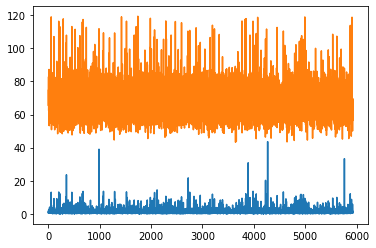

In [6]:
plt.plot(y_train)

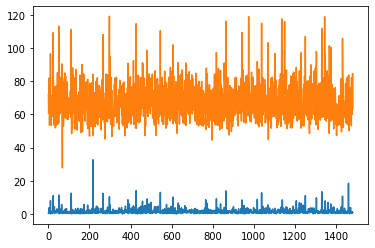

In [7]:
plt.plot(y_test)

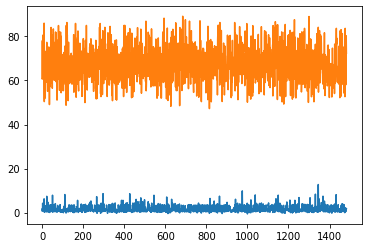

In [8]:
plt.plot(y_pred)

In [9]:
rss=np.sum(np.square(y_test-y_pred))
print(rss)

76088.43781701071


In [10]:
len(X)

7411

In [11]:
import statsmodels.api as sm

X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
print(X_train)

[[  13.032  1016.3      89.368  ...  549.75    132.65     11.829 ]
 [  28.758  1015.7      46.848  ...  549.73    133.1      12.143 ]
 [  14.819  1026.1      69.537  ...  540.92    140.89     12.608 ]
 ...
 [   9.6518 1024.9      73.574  ...  528.35    161.07     14.146 ]
 [  12.931  1016.       92.008  ...  550.13    133.68     11.738 ]
 [  18.934  1014.5      82.974  ...  533.56    155.11     13.754 ]]


In [14]:
X_train_opt = X_train[:,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
model_co = sm.OLS(y_co_train, X_train_opt)
results =model_co.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              1554.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:14:01   Log-Likelihood:                         -10068.
No. Observations:                5928   AIC:                                  2.015e+04
Df Residuals:                    5919   BIC:                                  2.021e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0789      0.008     -9.465      0.000      -0.095      -0.063
x2             0.0446      0.004     11.598      0.000       0.037       0.052
x3             0.0013      0.002      0.762      0.446      -0.002       0.005
x4             0.2994      0.065      4.579      0.000       0.171       0.428
x5            -0.1944      0.087     -2.224      0.026      -0.366      -0.023
x6             0.2003      0.024      8.377      0.000       0.153       0.247
x7            -0.3800      0.035    -10.974      0.000      -0.448      -0.312
x8            -0.3297      0.019    -16.968      0.000      -0.368      -0.292
x9            -0.3530      0.267     -1.320      0.187      -0.877       0.171
==============================================================================
Omnibus:                     9506.745   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11928852.731
Skew:                          10.117   Prob(JB):                         0.00
Kurtosis:                     221.828   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_train_opt = X_train[:,[0, 1, 3, 4, 5, 6, 7, 8]]
model_co  = sm.OLS(y_co_train, X_train_opt)
results =model_co.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              1748.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:14:17   Log-Likelihood:                         -10068.
No. Observations:                5928   AIC:                                  2.015e+04
Df Residuals:                    5920   BIC:                                  2.021e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0819      0.007    -11.084      0.000      -0.096      -0.067
x2             0.0442      0.004     11.597      0.000       0.037       0.052
x3             0.2935      0.065      4.521      0.000       0.166       0.421
x4            -0.1801      0.085     -2.110      0.035      -0.348      -0.013
x5             0.2001      0.024      8.368      0.000       0.153       0.247
x6            -0.3783      0.035    -10.948      0.000      -0.446      -0.311
x7            -0.3323      0.019    -17.373      0.000      -0.370      -0.295
x8            -0.3590      0.267     -1.344      0.179      -0.883       0.165
==============================================================================
Omnibus:                     9506.871   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11933795.258
Skew:                          10.117   Prob(JB):                         0.00
Kurtosis:                     221.873   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_train_opt = X_train[:,[0, 1, 3, 4, 5, 6, 7]]
model_co  = sm.OLS(y_co_train, X_train_opt)
results =model_co.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              1997.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:15:54   Log-Likelihood:                         -10069.
No. Observations:                5928   AIC:                                  2.015e+04
Df Residuals:                    5921   BIC:                                  2.020e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0832      0.007    -11.380      0.000      -0.098      -0.069
x2             0.0439      0.004     11.535      0.000       0.036       0.051
x3             0.2871      0.065      4.435      0.000       0.160       0.414
x4            -0.1802      0.085     -2.111      0.035      -0.348      -0.013
x5             0.1862      0.022      8.633      0.000       0.144       0.228
x6            -0.3570      0.031    -11.626      0.000      -0.417      -0.297
x7            -0.3364      0.019    -17.812      0.000      -0.373      -0.299
==============================================================================
Omnibus:                     9504.771   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11918250.744
Skew:                          10.113   Prob(JB):                         0.00
Kurtosis:                     221.730   Cond. No.                     8.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
predictor_co = LinearRegression()
predictor_co.fit(X_train_opt,y_co_train)
y_co_pred = predictor_co.predict(X_test[:, [0, 1, 3, 4, 5, 6, 7]])

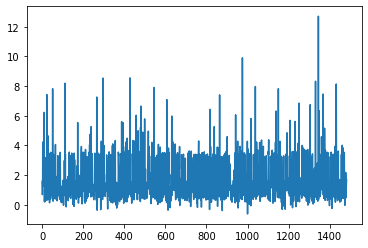

In [18]:
plt.plot(y_co_pred)

In [21]:
X_train_opt_nox = X_train[:,[0, 1, 2, 3, 4, 5, 6, 7, 8]]
model_nox = sm.OLS(y_nox_train, X_train_opt_nox)
results_nox =model_nox.fit()
results_nox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          6.828e+04
Date:                Wed, 28 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:18:07   Log-Likelihood:                         -19666.
No. Observations:                5928   AIC:                                  3.935e+04
Df Residuals:                    5919   BIC:                                  3.941e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.3624      0.042    -32.364      0.000      -1.445      -1.280
x2            -0.1925      0.019     -9.913      0.000      -0.231      -0.154
x3            -0.2554      0.009    -29.915      0.000      -0.272      -0.239
x4             3.6378      0.330     11.021      0.000       2.991       4.285
x5            -5.9840      0.441    -13.558      0.000      -6.849      -5.119
x6             1.8058      0.121     14.956      0.000       1.569       2.043
x7            -2.4195      0.175    -13.839      0.000      -2.762      -2.077
x8            -1.0948      0.098    -11.159      0.000      -1.287      -0.903
x9            -3.9118      1.350     -2.898      0.004      -6.558      -1.266
==============================================================================
Omnibus:                     1428.756   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14247.333
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                      10.396   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is already optimized for NOX emissions. Hence the previous predictions hold true.

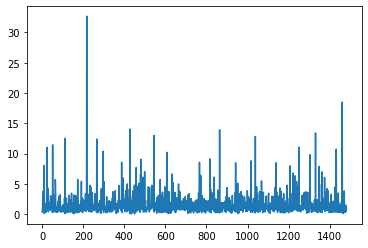

In [22]:
plt.plot(y_co_test)

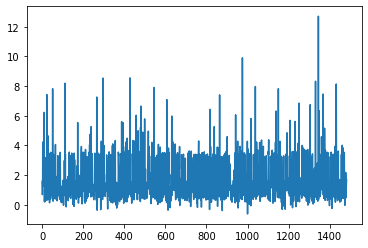

In [23]:
plt.plot(y_co_pred)

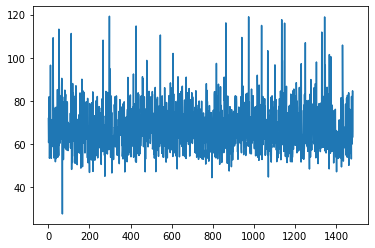

In [24]:
plt.plot(y_nox_test)

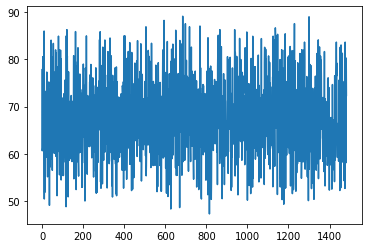

In [25]:
plt.plot(y_pred[ : , 1:])

In [28]:
regressor.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5805132864602122

In [29]:
y_co_test.reshape((len(y_co_test),1))
predictor_co.score(X_test[:,[0, 1, 3, 4, 5, 6, 7]],y_co_test)

0.48211720895478316